In [16]:
import zipfile
import os
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


# Path to your zip file
zip_path = r'D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd\00037.zip'
extract_dir = r'D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00037'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents extracted to {extract_dir}")


Contents extracted to D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00037


In [2]:
# List files in the extraction directory
files = os.listdir(extract_dir)
print("Extracted files:", files)

Extracted files: ['depth', 'rgb']


In [ ]:
#Rename Files

def rename_files(directory):
    # List all files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.png')]
    
    # Sort files to ensure correct order
    files.sort()
    
    # Rename files
    for i, filename in enumerate(files, start=1):
        new_name = f"{i}.png"
        src = os.path.join(directory, filename)
        dst = os.path.join(directory, new_name)
        os.rename(src, dst)
        print(f"Renamed {src} to {dst}")

# Path to the directory containing the files
directory = r"D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00021\depth"

# Call the function
rename_files(directory)

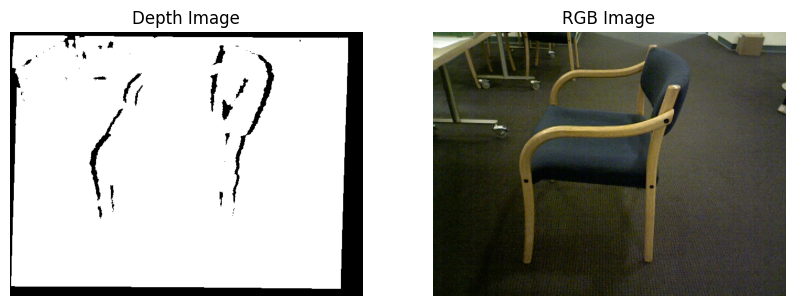

In [11]:
# Paths to your images
depth_image_path = r'D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00021\depth\0000001-000000000000.png'
rgb_image_path = r'D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00021\rgb\0000001-000000000000.jpg'

# Open images
depth_image = Image.open(depth_image_path)
rgb_image = Image.open(rgb_image_path)

# Display the depth image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Depth Image')
plt.imshow(depth_image, cmap='gray')
plt.axis('off')

# Display the RGB image
plt.subplot(1, 2, 2)
plt.title('RGB Image')
plt.imshow(rgb_image)
plt.axis('off')

plt.show()

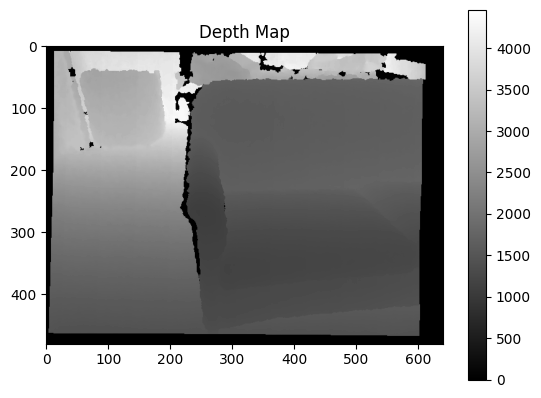

In [24]:
# Read the depth map using OpenCV
depth_map_path = r'D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00034\depth\0000001-000000000000.png'
depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)

# If the image has a single channel, it will be in grayscale format
if len(depth_map.shape) == 2:
    plt.imshow(depth_map, cmap='gray')
    plt.colorbar()
    plt.title('Depth Map')
    plt.show()
else:
    print("The depth map has multiple channels, expected a single-channel grayscale image.")


In [29]:
# Get Edge

def generate_edge_map(rgb_image_path, edge_output_path, low_threshold=50, high_threshold=150):
    # Read the RGB image
    image = cv2.imread(rgb_image_path)

    # Check if the image is loaded correctly
    if image is None:
        print(f"Error: Unable to read image at {rgb_image_path}. Please check the file path.")
        return
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)

    # Save the edge map
    cv2.imwrite(edge_output_path, edges)

def process_all_images(rgb_directory, edge_directory, low_threshold=50, high_threshold=150):
    # Create the edge output directory if it doesn't exist
    if not os.path.exists(edge_directory):
        os.makedirs(edge_directory)

    # List all .jpg files in the rgb directory
    files = [f for f in os.listdir(rgb_directory) if f.endswith('.jpg')]
    
    for filename in files:
        rgb_image_path = os.path.join(rgb_directory, filename)
        edge_output_path = os.path.join(edge_directory, filename.replace('.jpg', '.png'))
        
        # Generate edge map for each image
        generate_edge_map(rgb_image_path, edge_output_path, low_threshold, high_threshold)

# Paths to the input RGB directory and the output edge directory
rgb_directory = r'D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00037\rgb'
edge_directory = r'D:\Jupyter\3D Construction\Dataset\redwood-3dscan\data\rgbd_extract\00037\edge'

# Process all images
process_all_images(rgb_directory, edge_directory)

In [17]:
import open3d as o3d

# Load the .ply file
ply_path = "D:\\Jupyter\\3D Construction\\Dataset\\redwood-3dscan\\data\\mesh\\00034.ply"
mesh = o3d.io.read_triangle_mesh(ply_path)

# Visualize the mesh
o3d.visualization.draw_geometries([mesh])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
